# **Chapter 3. Python 을 활용한 데이터 전처리** 





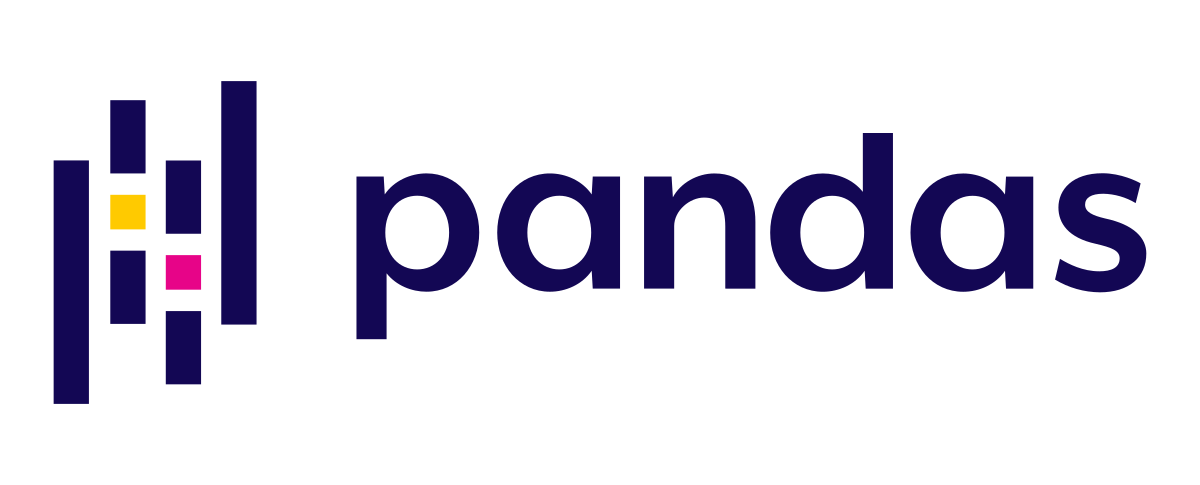


---
### **학습 목표**
> 3-4. Pandas 란? <br>
> 3-5. csv, excel 파일 읽고 쓰기, 요약 정보 한눈에 확인하기 <br>
> 3-6. 데이터 슬라이싱을 통해 Pandas 익숙해지기 <br>
> 3-7. 통계값 계산 및 정렬 방법 익히기 <br>
> 3-8. 피벗 테이블(pivot table) 기능과 그룹 통계(groupby) <br>
> 3-9. 데이터 합치기 (Join 과 Merge, Concat) <br>
> **3-10. 자료형 변환, 산술 연산** <br>
> 3-11. 전처리의 기본! 결측값, 중복 처리 <br>
> 3-12. 고급 기능 (apply, lambda, map) 으로 나도 이제 Pandas 고수! <br>
> 3-13. Pandas 시각화로 멋지게 레포팅하자 <br>
> 3-14. 실습 예제 <br>

## 3-10. 자료형 변환, 산술 연산

In [73]:
# 라이브러리 임포트
import pandas as pd

In [74]:
# 실습 파일 로딩 (아이돌 프로필)
df = pd.read_csv('https://bit.ly/3gRXTfD')

In [75]:
# 상위 7개 정보 사용
df = df.iloc[:,1:11].head(7)

In [76]:
df = df[['Korean Name', 'Date of Birth', 'Height', 'Weight']] 
df

,Korean Name,Date of Birth,Height,Weight
0,김태연,1989-03-09,160,44
1,이순규,1989-05-15,158,43
2,황미영,1989-08-01,163,50
3,김효연,1989-09-22,158,48
4,권유리,1989-12-05,167,45
5,최수영,1990-02-10,170,48
6,임윤아,1990-05-30,166,47


> ###  **3-10-1. 자료형 변환**


> Pandas 에서는 **`astype('변환하려는 자료형')` 으로 데이터 자료형을 변환**할 수 있습니다.
> - 자주 쓰이는 Pandas 자료형은 **정수(`int`), 실수(`float`), 문자열(`str`), 일자시간타입(`datetime`)** 이 있습니다.
> - 일자 시간 타입은 **`to_datetime()`** 함수로 손쉽게 변환이 가능합니다.


In [77]:
df

,Korean Name,Date of Birth,Height,Weight
0,김태연,1989-03-09,160,44
1,이순규,1989-05-15,158,43
2,황미영,1989-08-01,163,50
3,김효연,1989-09-22,158,48
4,권유리,1989-12-05,167,45
5,최수영,1990-02-10,170,48
6,임윤아,1990-05-30,166,47


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Korean Name    7 non-null      object
 1   Date of Birth  7 non-null      object
 2   Height         7 non-null      int64 
 3   Weight         7 non-null      int64 
dtypes: int64(2), object(2)
memory usage: 352.0+ bytes


> **1. int -> str 타입 변환 (`astype('str')`)**

In [79]:
df['Height'] = df['Height'].astype('str')

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Korean Name    7 non-null      object
 1   Date of Birth  7 non-null      object
 2   Height         7 non-null      object
 3   Weight         7 non-null      int64 
dtypes: int64(1), object(3)
memory usage: 352.0+ bytes


In [81]:
type(df['Height'][0])

str

> **2. str -> int 타입 변환 (`astype('int')`)**

In [82]:
df['Height'] = df['Height'].astype('int')

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Korean Name    7 non-null      object
 1   Date of Birth  7 non-null      object
 2   Height         7 non-null      int64 
 3   Weight         7 non-null      int64 
dtypes: int64(2), object(2)
memory usage: 352.0+ bytes


In [84]:
type(df['Height'][0])

numpy.int64

> **3-1. str -> datetime 타입 변환 (`pd.to_datetime(df['컬럼명'])`**
> - datetime 이란?
    - Pandas 에서 **날짜와 시간 데이터를 처리**하기 위해 지원하는 자료형입니다.
    - datetime 자료형으로 변환하면, **날짜 슬라이싱과, 시간 연산 (일, 시, 분, 초 단위 등) 이 가능**해집니다!
    - Python 자체적으로 제공하는 `datetime` 라이브러리를 사용하는 방법도 있지만, Pandas 라이브러리를 사용할 땐, Pandas 자료형을 사용하는 것이 효율적입니다.

In [85]:
df

,Korean Name,Date of Birth,Height,Weight
0,김태연,1989-03-09,160,44
1,이순규,1989-05-15,158,43
2,황미영,1989-08-01,163,50
3,김효연,1989-09-22,158,48
4,권유리,1989-12-05,167,45
5,최수영,1990-02-10,170,48
6,임윤아,1990-05-30,166,47


In [86]:
df['Date of Birth'][0]

'1989-03-09'

In [87]:
df['Date of Birth'] = pd.to_datetime(df['Date of Birth'])

In [88]:
df['Date of Birth'][0]

Timestamp('1989-03-09 00:00:00')

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Korean Name    7 non-null      object        
 1   Date of Birth  7 non-null      datetime64[ns]
 2   Height         7 non-null      int64         
 3   Weight         7 non-null      int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 352.0+ bytes


> **3-2. datetime 타입 으로 날짜 슬라이싱**
> - datetime 으로 변환된 데이터는, 손쉽게 월, 일, 요일 등 날짜/시간 정보를 추출할 수 있습니다.
> - datetime 의 약어 인 `dt` 를 사용하는 예제입니다.

 

In [90]:
df['Date of Birth']

0   1989-03-09
1   1989-05-15
2   1989-08-01
3   1989-09-22
4   1989-12-05
5   1990-02-10
6   1990-05-30
Name: Date of Birth, dtype: datetime64[ns]

In [91]:
df['Date of Birth'].dt

In [92]:
# 연도 추출
df['Date of Birth'].dt.year

0    1989
1    1989
2    1989
3    1989
4    1989
5    1990
6    1990
Name: Date of Birth, dtype: int64

In [93]:
# 월 추출
df['Date of Birth'].dt.month

0     3
1     5
2     8
3     9
4    12
5     2
6     5
Name: Date of Birth, dtype: int64

In [94]:
# 일 추출
df['Date of Birth'].dt.day

0     9
1    15
2     1
3    22
4     5
5    10
6    30
Name: Date of Birth, dtype: int64

In [95]:
# 요일 추출 (월요일: 0, 화요일: 1, 수요일: 2, 목요일: 3, 금요일: 4, 토요일: 5, 일요일: 6)
df['Date of Birth'].dt.dayofweek

0    3
1    0
2    1
3    4
4    1
5    5
6    2
Name: Date of Birth, dtype: int64

In [169]:
# 데이터 프레임에 추가
df['Year of Birth'] = df['Date of Birth'].dt.year
df['Month of Birth'] = df['Date of Birth'].dt.month
df['Day of Birth'] = df['Date of Birth'].dt.day

In [170]:
df

,Korean Name,Date of Birth,Height,Weight,Year of Birth,Month of Birth,Day of Birth
0,김태연,1989-03-09,160,44,1989,3,9
1,이순규,1989-05-15,158,43,1989,5,15
2,황미영,1989-08-01,163,50,1989,8,1
3,김효연,1989-09-22,158,48,1989,9,22
4,권유리,1989-12-05,167,45,1989,12,5
5,최수영,1990-02-10,170,48,1990,2,10
6,임윤아,1990-05-30,166,47,1990,5,30


> ###  **3-10-2. 산술 연산**


> - Pandas 에서는 같은 타입 자료형을 가지는 데이터끼리 **산술 연산이 가능합니다.**
> - 다른 타입 자료형 연산을 시도할 경우, 에러가 발생하니 그전에 자료형 확인을 해주세요!



> **사칙 연산**

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Korean Name     7 non-null      object        
 1   Date of Birth   7 non-null      datetime64[ns]
 2   Height          7 non-null      int64         
 3   Weight          7 non-null      int64         
 4   Year of Birth   7 non-null      int64         
 5   Month of Birth  7 non-null      int64         
 6   Day of Birth    7 non-null      int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 520.0+ bytes


In [172]:
# 사칙연산
df['Height'] + df['Weight']

0    204
1    201
2    213
3    206
4    212
5    218
6    213
dtype: int64

In [173]:
df['Height'] - df['Weight']

0    116
1    115
2    113
3    110
4    122
5    122
6    119
dtype: int64

In [174]:
df['Height'] * df['Weight']

0    7040
1    6794
2    8150
3    7584
4    7515
5    8160
6    7802
dtype: int64

In [175]:
df['Height'] / df['Weight']

0    3.636364
1    3.674419
2    3.260000
3    3.291667
4    3.711111
5    3.541667
6    3.531915
dtype: float64

In [176]:
df['Height'] + 10

0    170
1    168
2    173
3    168
4    177
5    180
6    176
Name: Height, dtype: int64

In [177]:
df['Height'] * 10

0    1600
1    1580
2    1630
3    1580
4    1670
5    1700
6    1660
Name: Height, dtype: int64

> **데이트타임(datetime) 연산**
> - Pandas 에서 날짜/시간 연산을 하기 위해서는, **더하고 빼는 값의 자료형이 시간 간격(`pd.Timedelta`)** 이어야 합니다!
> - **`pd.to_timedelta(df['컬럼명'], unit='시간 간격 단위')`**
> - 변환할 수 있는 시간 간격 단위는 일(`day`), 시(`hour`), 분(`min`), 초(`sec`) 등이 있습니다.

In [178]:
df

,Korean Name,Date of Birth,Height,Weight,Year of Birth,Month of Birth,Day of Birth
0,김태연,1989-03-09,160,44,1989,3,9
1,이순규,1989-05-15,158,43,1989,5,15
2,황미영,1989-08-01,163,50,1989,8,1
3,김효연,1989-09-22,158,48,1989,9,22
4,권유리,1989-12-05,167,45,1989,12,5
5,최수영,1990-02-10,170,48,1990,2,10
6,임윤아,1990-05-30,166,47,1990,5,30


In [179]:
df['Date of Birth'] + df['Day of Birth']

TypeError: ignored

In [183]:
# pd.Timedelta 자료형으로 변환 (to_timedelta)
df['Day of Birth'] = pd.to_timedelta(df['Day of Birth'], unit="day")

In [184]:
df

,Korean Name,Date of Birth,Height,Weight,Year of Birth,Month of Birth,Day of Birth
0,김태연,1989-03-09,160,44,1989,3,9 days
1,이순규,1989-05-15,158,43,1989,5,15 days
2,황미영,1989-08-01,163,50,1989,8,1 days
3,김효연,1989-09-22,158,48,1989,9,22 days
4,권유리,1989-12-05,167,45,1989,12,5 days
5,최수영,1990-02-10,170,48,1990,2,10 days
6,임윤아,1990-05-30,166,47,1990,5,30 days


In [ ]:
df.info()

In [186]:
df['Date of Birth'] + df['Day of Birth']

0   1989-03-18
1   1989-05-30
2   1989-08-02
3   1989-10-14
4   1989-12-10
5   1990-02-20
6   1990-06-29
dtype: datetime64[ns]

> **통계 연산**
> - 합계(`sum()`), 평균(`mean()`), 최소/최대값(`min()`, `max()`), 과 같은 통계 연산도 지원합니다.
> - 행 계산 (`axis = 0`), 열 계산 (`axis = 1`)

In [187]:
df = pd.DataFrame({'국어': [100, 60, 50, 75], '수학': [80, 70, 65, 90], '영어': [90, 55, 85, 70]})

In [188]:
df

,국어,수학,영어
0,100,80,90
1,60,70,55
2,50,65,85
3,75,90,70


In [193]:
# 행 합계
df.sum(axis=0)

국어    285
수학    305
영어    300
dtype: int64

In [194]:
# 행 평균
df.mean(axis=0)

국어    71.25
수학    76.25
영어    75.00
dtype: float64

In [195]:
# 열 합계
df.sum(axis=1)

0    270
1    185
2    200
3    235
dtype: int64

In [196]:
# 열 평균
df.mean(axis=1)

0    90.000000
1    61.666667
2    66.666667
3    78.333333
dtype: float64